In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

def perform_ttest(standard, hybrid):
    # Standard BLEU scores 
    standard_scores = standard['BLEU_SCORE'].dropna().to_numpy()

    # Hybrid BLEU scores
    hybrid_scores = hybrid['BLEU_SCORE'].dropna().to_numpy()

    # Perform t-test to determine if the difference in BLEU scores is significant
    t, p = stats.ttest_ind(standard_scores, hybrid_scores)

    print("t-statistic: ", t)
    print("p-value: ", p)

    # Evaluate if the null hypothesis can be rejected based on the p-value
    if p < 0.05: # standrd significance level
        print("Null hypothesis rejected, significant difference between the two models.")
    else:
        print("Null hypothesis not rejected, no significant difference between the two models.")
    
    # Plot the histograms
    plt.hist(standard_scores, bins=30, alpha=0.5, label='Standard')
    plt.hist(hybrid_scores, bins=30, alpha=0.5, label='Hybrid')
    plt.legend()
    plt.title("Kurtosis of Datasets")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.show()

ILOKANO TO TAGALOG:
t-statistic:  -34.21075617660087
p-value:  3.6868319572966233e-243
Null hypothesis rejected, significant difference between the two models.


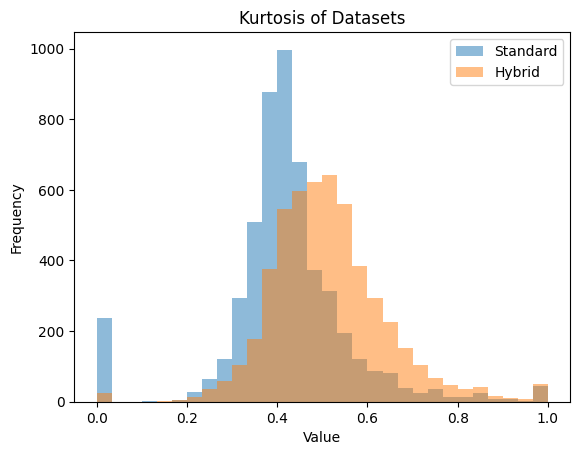


TAGALOG TO ILOKANO:
t-statistic:  -45.36169650558874
p-value:  0.0
Null hypothesis rejected, significant difference between the two models.


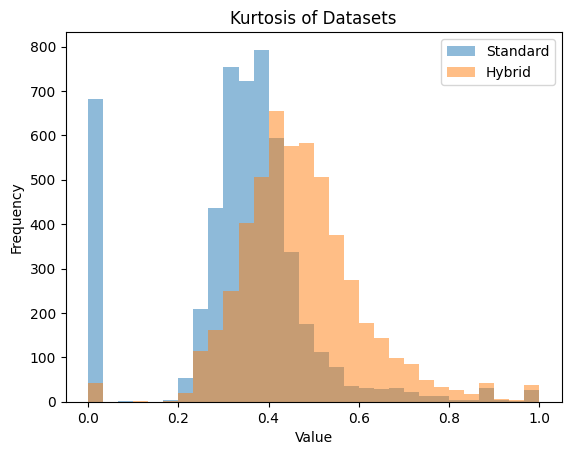

In [3]:
standard = pd.read_csv('../src/scores/Ilokano to Tagalog/Standard Translator/test/test_bleu_il-tl.csv')
hybrid = pd.read_csv('../src/scores/Ilokano to Tagalog/Hybrid Translator/test/test_bleu_il-tl.csv')
print("ILOKANO TO TAGALOG:")
perform_ttest(standard, hybrid)

standard = pd.read_csv('../src/scores/Tagalog to Ilokano/Standard Translator/test/test_bleu_tl-il.csv')
hybrid = pd.read_csv('../src/scores/Tagalog to Ilokano/Hybrid Translator/test/test_bleu_tl-il.csv')
print("\nTAGALOG TO ILOKANO:")
perform_ttest(standard, hybrid)